# ***---------- CI7521* - Machine Learning with Deep Neural Networks----------**

## **Real-Time Financial Forecasting Using Deep Learning**

## **Team Members**

1.	Menge Samruddhi Sanjay K2377469
2.	Rajput Shivam K2437852
3.	Anastasios Papantonopoulos K1932447
4.	Itape Tanmay Vithal K2352164

## **Objective**
**To develop and compare four different Deep Learning models to forecast GBP/USD exchange rates using historical time series data.**

# **Data Preprocessing**

## **Step 1: Import Libraries**

In [34]:
!pip install tensorflow keras-tuner numpy pandas matplotlib scikit-learn

In [35]:
# Basic Libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


# Preprocessing & Metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

# Deep Learning Core (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization,
    Conv1D, LSTM, GRU, SimpleRNN
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Tabular Summary (for model comparison)
from tabulate import tabulate


# Ensures reproducible results by fixing the random seed across Python, NumPy, and TensorFlow.


import os
import random
import numpy as np
import tensorflow as tf

# Set seed values
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## **Step 2: Load the Dataset**

In [36]:
#Load the dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("GBPUSD_open_5year.csv")
print(df)

Saving GBPUSD_open_5year.csv to GBPUSD_open_5year (1).csv
      Unnamed: 0        Date    Open        Time
0              0    9/4/2020  1.2470  1586390400
1              1  14/04/2020  1.2594  1586822400
2              2  15/04/2020  1.2498  1586908800
3              3  16/04/2020  1.2451  1586995200
4              4  17/04/2020  1.2504  1587081600
...          ...         ...     ...         ...
1195        1195    7/1/2025  1.2498  1736208000
1196        1196    8/1/2025  1.2342  1736294400
1197        1197    9/1/2025  1.2303  1736380800
1198        1198   10/1/2025  1.2230  1736467200
1199        1199  13/01/2025  1.2152  1736726400

[1200 rows x 4 columns]


## **Step 3: Clean and Prepare Data and Visualization**


1.   Handle nulls values
2.   Checking duplicates
3.   Format date columns
4.   Normalize/scale features



In [37]:
# Display the first few rows

df_head = df.head()

# Print the first few rows
print(tabulate(df_head, headers='keys', tablefmt='pretty'))

+---+------------+------------+--------+------------+
|   | Unnamed: 0 |    Date    |  Open  |    Time    |
+---+------------+------------+--------+------------+
| 0 |     0      |  9/4/2020  | 1.247  | 1586390400 |
| 1 |     1      | 14/04/2020 | 1.2594 | 1586822400 |
| 2 |     2      | 15/04/2020 | 1.2498 | 1586908800 |
| 3 |     3      | 16/04/2020 | 1.2451 | 1586995200 |
| 4 |     4      | 17/04/2020 | 1.2504 | 1587081600 |
+---+------------+------------+--------+------------+


In [38]:
# Checking the data types
print(df.dtypes)

Unnamed: 0      int64
Date           object
Open          float64
Time            int64
dtype: object


In [39]:
#converting the date column to datatime format

df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
# Convert date col into Datetime format
print(df.dtypes)

Unnamed: 0             int64
Date          datetime64[ns]
Open                 float64
Time                   int64
dtype: object


In [40]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [41]:
# Check for missing values
print(df.isnull().sum())

#drop the unnamed columns
df = df.drop(columns=['Unnamed: 0'])

Unnamed: 0    0
Date          0
Open          0
Time          0
dtype: int64


In [42]:
# Display summary statistics
summary_statistics = df.describe()
print(tabulate(summary_statistics, headers='keys', tablefmt='pretty'))

+-------+---------------------+---------------------+-------------------+
|       |        Date         |        Open         |       Time        |
+-------+---------------------+---------------------+-------------------+
| count |        1200         |       1200.0        |      1200.0       |
| mean  | 2022-08-27 02:32:24 | 1.2838001666666665  |   1661567544.0    |
|  min  | 2020-04-09 00:00:00 |       1.0745        |   1586390400.0    |
|  25%  | 2021-06-20 06:00:00 | 1.2410750000000002  |   1624168800.0    |
|  50%  | 2022-08-25 12:00:00 |       1.2732        |   1661428800.0    |
|  75%  | 2023-11-03 18:00:00 | 1.3331499999999998  |   1699034400.0    |
|  max  | 2025-01-13 00:00:00 |       1.4211        |   1736726400.0    |
|  std  |         nan         | 0.06648865994706812 | 43394284.04533612 |
+-------+---------------------+---------------------+-------------------+


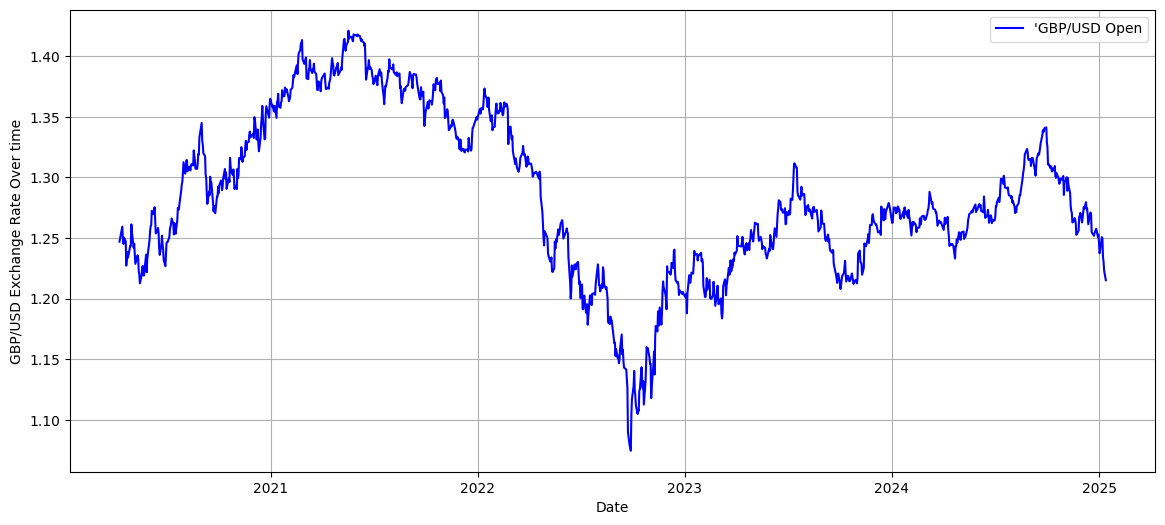

In [43]:
# Plot GBP/USD exchange rate trend
plt.figure(figsize=(14,6))
plt.plot(df['Date'],df['Open'],label= "'GBP/USD Open", color = 'blue')
plt.xlabel('Date')
plt.ylabel('GBP/USD Exchange Rate Over time')
plt.legend()
plt.grid()
plt.show()



In [44]:
# Print min/max before normalization
print(f"Before Normalization:\nMin: {df['Open'].min()}, Max: {df['Open'].max()}")

# Scale the entire 'Open' column before splitting
scaler = MinMaxScaler(feature_range=(0, 1))
df['Open'] = scaler.fit_transform(df[['Open']])

# Print min/max after normalization
print(f"After Normalization :\nMin: {df['Open'].min()}, Max: {df['Open'].max()}")


Before Normalization:
Min: 1.0745, Max: 1.4211
After Normalization :
Min: 0.0, Max: 0.9999999999999996


# **Step 4: Train-Test Split**

In [45]:
#	Define the data into training (70%), validation (15%), and testing (15%) sets.

train_size = int(len(df)* 0.7)  #70% of data for training
val_size = int(len(df)* 0.15)  # 15% for validation
test_size = len(df)- train_size - val_size  # Remaining 15% for testing

# Splitting the data
# We use .copy() to ensure each subset is independent and does not affect the original DataFrame (df).

train_data = df.iloc[:train_size].copy()
val_data = df.iloc[train_size:train_size + val_size].copy()
test_data = df.iloc[train_size + val_size:].copy()

# Fit and transform
scaler = MinMaxScaler(feature_range=(0,1))
train_data['Open'] = scaler.fit_transform(train_data[['Open']])
val_data['Open'] = scaler.transform(val_data[['Open']])
test_data['Open'] = scaler.transform(test_data[['Open']])

# Confirm the splits
print(f"Trainig_Data_Size: {len(train_data)}")
print(f"Validation_Data_Size: {len(val_data)}")
print(f"Testing_Data_Size: {len(test_data)}")

Trainig_Data_Size: 840
Validation_Data_Size: 180
Testing_Data_Size: 180


## **Model_1 Simple Feedforward Neural Network (FNN)**



## **----------Model_Architecture----------**

In [46]:
# Convert to DataFrames
train_scaled = pd.DataFrame(train_data, columns=['Open'], index=train_data.index)
val_scaled = pd.DataFrame(val_data, columns=['Open'], index=val_data.index)
test_scaled = pd.DataFrame(test_data, columns=['Open'], index=test_data.index)

# Supervised learning format
def create_dataset(data, lookback=10):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data.iloc[i:i + lookback]['Open'].values)
        y.append(data.iloc[i + lookback]['Open'])
    return np.array(X), np.array(y)

lookback = 10
X_train, y_train = create_dataset(train_scaled, lookback)
X_val, y_val = create_dataset(val_scaled, lookback)
X_test, y_test = create_dataset(test_scaled, lookback)

#  Final Reshape
X_train = X_train.reshape(X_train.shape[0], -1).astype("float32")
X_val = X_val.reshape(X_val.shape[0], -1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], -1).astype("float32")

y_train = y_train.astype("float32").reshape(-1, 1)
y_val = y_val.astype("float32").reshape(-1, 1)
y_test = y_test.astype("float32").reshape(-1, 1)

#FNN Model Architecture

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Output for regression
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **---------Training Process-----------**

In [47]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

#Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1979 - mae: 0.3362 - val_loss: 0.0556 - val_mae: 0.2287
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0599 - mae: 0.1916 - val_loss: 0.0022 - val_mae: 0.0420
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0256 - mae: 0.1232 - val_loss: 0.0016 - val_mae: 0.0294
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0228 - mae: 0.1142 - val_loss: 9.6900e-04 - val_mae: 0.0269
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0181 - mae: 0.1054 - val_loss: 0.0039 - val_mae: 0.0543
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0156 - mae: 0.0977 - val_loss: 0.0019 - val_mae: 0.0385
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0116 - mae: 0.0841 - val_loss: 0.0016 - val_mae: 0.0340
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0106 - mae: 0.0801 - val_loss: 0.0076 - val_mae: 0.0816
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - l

## **Evaluation**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

FNN Model Performance:
MAE: 0.022
MAPE: 3.626
MSE: 0.001
RMSE: 0.027
R² Score: 0.845


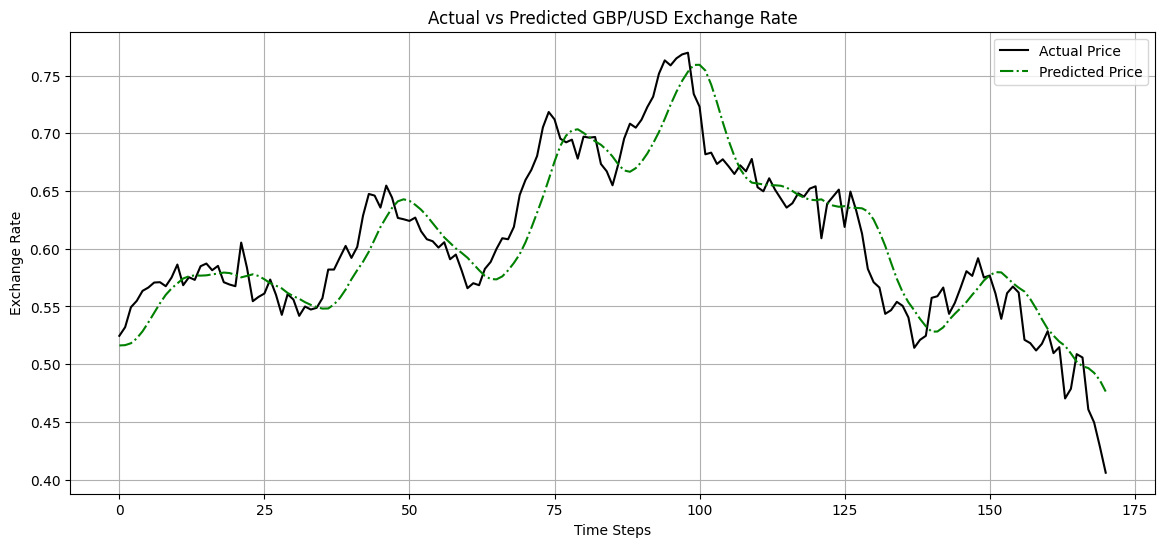

In [61]:


# Predict
y_pred = model.predict(X_test)

# Evaluation Function with Rounded Values
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        "MAE": round(mae, 3),
        "MAPE": round(mape, 3),
        "MSE": round(mse, 3),
        "RMSE": round(rmse, 3),
        "R² Score": round(r2, 3)
    }

# Get Rounded Results
results = evaluate_model(y_test, y_pred)

# Print Rounded Metrics
print("\nFNN Model Performance:")
for metric, value in results.items():
    print(f"{metric}: {value}")

# Visualization: Predictions vs Actual
plt.figure(figsize=(14, 6))
plt.plot(y_test, label="Actual Price", color="black")
plt.plot(y_pred, label="Predicted Price", color="green", linestyle="dashdot")
plt.title("Actual vs Predicted GBP/USD Exchange Rate")
plt.xlabel("Time Steps")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid(True)
plt.show()

## **Model_2 CNN + LSTM (Hybrid)**

### **-------------Architecture--------------**

In [49]:
# Function to create time-series sequences for CNN model
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length]['Open'].values.reshape(-1, 1))
        y.append(data.iloc[i+seq_length]['Open'])  # Target value
    return np.array(X), np.array(y)

# Sequence length
seq_length = 30  # Last 30 days

# Apply the function to each dataset
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape data for CNN + LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], seq_length, 1)
X_val = X_val.reshape(X_val.shape[0], seq_length, 1)
X_test = X_test.reshape(X_test.shape[0], seq_length, 1)

# Confirm dataset shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (810, 30, 1), y_train shape: (810,)
X_val shape: (150, 30, 1), y_val shape: (150,)
X_test shape: (150, 30, 1), y_test shape: (150,)


In [50]:
# Define CNN+LSTM model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 26, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 26, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,697 (96.47 KB)

 Trainable params: 24,697 (96.47 KB)

 Non-trainable params: 0 (0.00 B)

## **-------------Training Process---------------**

In [51]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the CNN model
history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2649 - mae: 0.4608 - val_loss: 0.0280 - val_mae: 0.1643
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0209 - mae: 0.1163 - val_loss: 0.0035 - val_mae: 0.0510
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0122 - mae: 0.0887 - val_loss: 0.0011 - val_mae: 0.0263
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0098 - mae: 0.0763 - val_loss: 9.2968e-04 - val_mae: 0.0243
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0083 - mae: 0.0699 - val_loss: 9.7107e-04 - val_mae: 0.0243
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0072 - mae: 0.0676 - val_loss: 9.5760e-04 - val_mae: 0.0241
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0071 - mae: 0.0668 - val_loss: 9.0206e-04 - val_mae: 0.0238
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0063 - mae: 0.0637 - val_loss: 8.9935e-04 - val_mae: 0.0232
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━

## **-------------Evaluation of Model -----------**

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
 # CNN + LSTM Hybrid Model Performance:
 1. MAE: 0.031
 2. MAPE : 5.22%
 3. MSE: 0.001
 4. RMSE: 0.038
 5. R² Score: 0.718


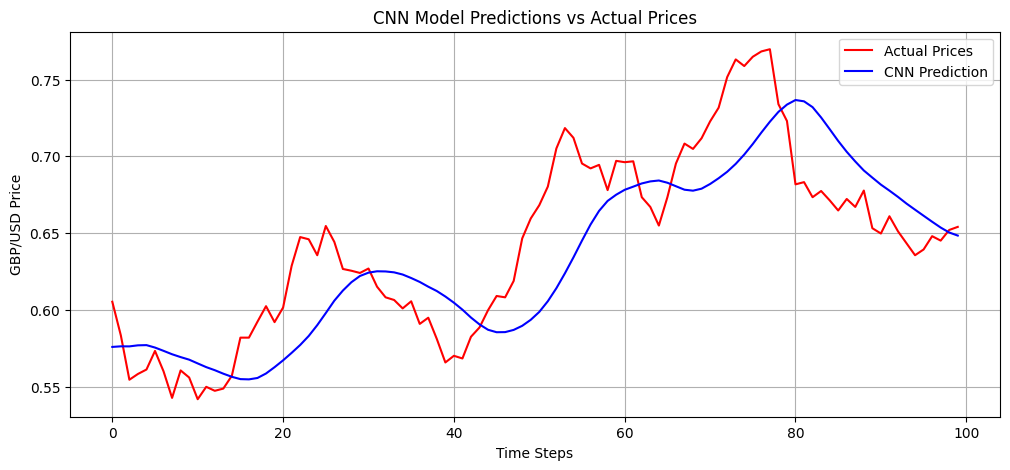

In [52]:
# Evaluate model function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f" # {model_name} Performance:")
    print(f" 1. MAE: {mae:.3f}")
    print(f" 2. MAPE : {mape*100:.2f}%")
    print(f" 3. MSE: {mse:.3f}")
    print(f" 4. RMSE: {rmse:.3f}")
    print(f" 5. R² Score: {r2:.3f}")

    return y_pred, mae, mape, mse, rmse, r2

# Evaluate CNN+LSTM model
y_pred_cnn_lstm, mae, mape, mse, rmse, r2 = evaluate_model(cnn_model, X_test, y_test, "CNN + LSTM Hybrid Model")



# Visualization Predictions vs Actual
plt.figure(figsize=(12,5))
plt.plot(y_test[:100], label="Actual Prices", color="red")
plt.plot(y_pred_cnn_lstm[:100].flatten(), label="CNN Prediction", color="blue")
plt.xlabel("Time Steps")
plt.ylabel("GBP/USD Price")
plt.title("CNN Model Predictions vs Actual Prices")
plt.legend()
plt.grid()
plt.show()


## **Model_3 GRU and RNN Model Comparsion**

## **Model_Architecture**

In [53]:
# Create sequences
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data['Open'].iloc[i:i+seq_len].values)
        y.append(data['Open'].iloc[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 10
X_train, y_train = create_sequences(train_data, seq_len)
X_val, y_val = create_sequences(val_data, seq_len)
X_test, y_test = create_sequences(test_data, seq_len)

X_train = X_train.reshape((X_train.shape[0], seq_len, 1))
X_val = X_val.reshape((X_val.shape[0], seq_len, 1))
X_test = X_test.reshape((X_test.shape[0], seq_len, 1))

# -------------------------------------------------------
# Model Architectures (RNN & GRU)
# -------------------------------------------------------

# GRU Model Architecture
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(seq_len, 1)),
    GRU(64),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')

# Simple RNN Model Architecture
rnn_model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(seq_len, 1)),
    SimpleRNN(64),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Model_Training**

In [54]:
# Training Function
def train_model(model, name):
    print(f"\n Training {name}")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=1
    )

    # Plot Loss Curve
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} - Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return history


## **Evaluation_of_Model**


 Training GRU Model
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1073 - val_loss: 8.7490e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0045 - val_loss: 8.9244e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0018 - val_loss: 8.6549e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012 - val_loss: 5.1119e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0010 - val_loss: 4.8041e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0010 - val_loss: 4.7139e-04
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0010 - val_loss: 4.6833e-04
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9480e-04 - val_loss: 4.6424e-04
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.8491e-04 - val_loss: 4.6176e-04
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.7572e-04 - val_loss: 4.6169e-04
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.6718e-04 - val

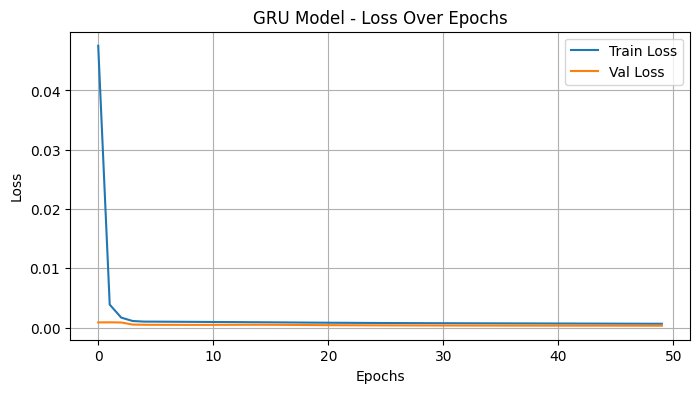

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step

 GRU Model Evaluation Metrics:
MAE: 0.014
MSE: 0.000
RMSE: 0.018
R²: 0.933
MAPE: 2.344


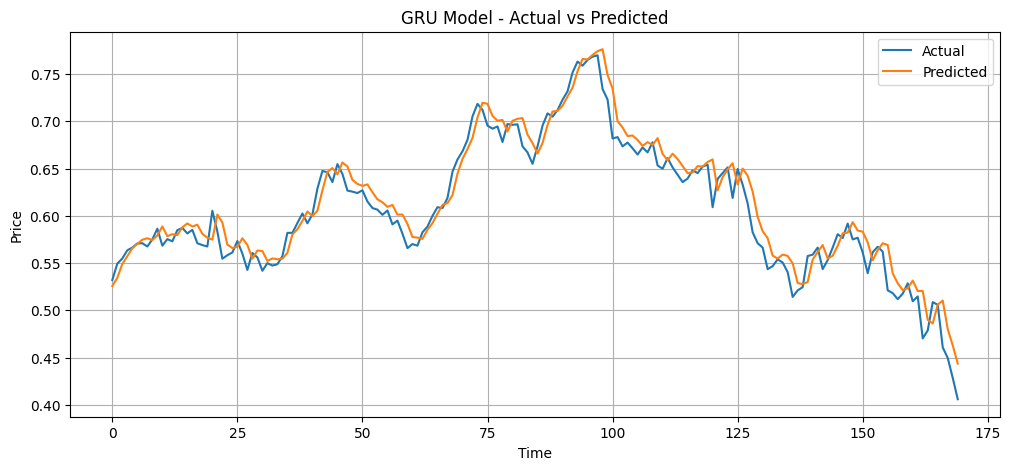


 Training Simple RNN Model
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4146 - val_loss: 0.0051
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 7.1094e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019 - val_loss: 6.5486e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 7.8701e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 5.9630e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 6.2551e-04
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 7.6330e-04
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 12/50
26/26

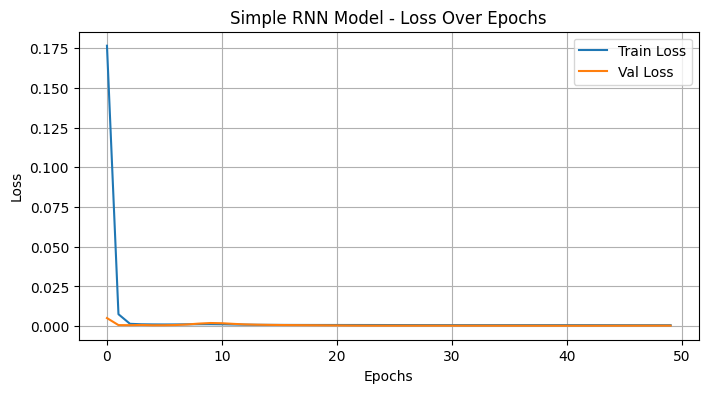

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

 Simple RNN Model Evaluation Metrics:
MAE: 0.016
MSE: 0.000
RMSE: 0.021
R²: 0.912
MAPE: 2.683


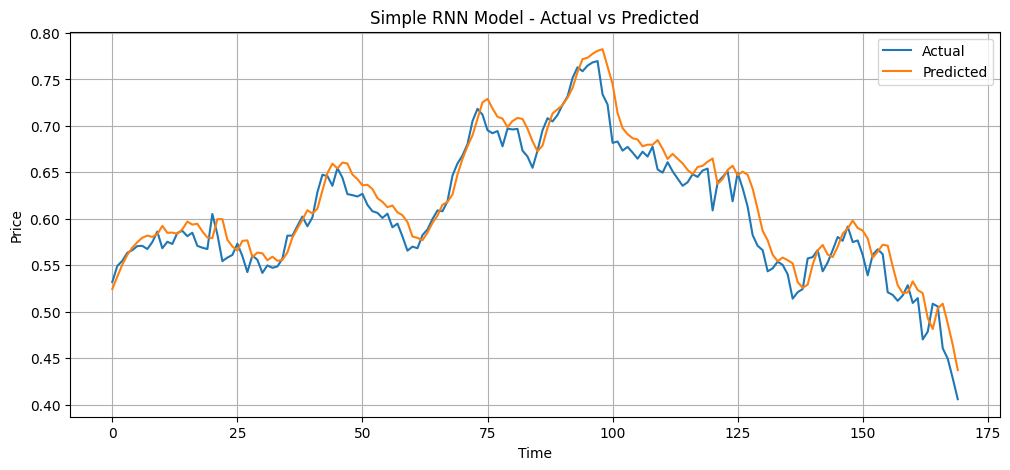

In [55]:
# Metric Calculation
def calc_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'MAPE': mape}

# Evaluation Function
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

    results = calc_metrics(y_true, y_pred)

    print(f"\n {name} Evaluation Metrics:")
    for k, v in results.items():
        print(f"{k}: {v:.3f}")

    # Plot predictions
    plt.figure(figsize=(12, 5))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results


# Train and Evaluate GRU Model
train_model(gru_model, "GRU Model")
gru_metrics = evaluate_model(gru_model, "GRU Model")

# Train and Evaluate Simple RNN Model
train_model(rnn_model, "Simple RNN Model")
rnn_metrics = evaluate_model(rnn_model, "Simple RNN Model")

# **Model_ 4 Regression Based Model Comparsion Between LSTM and GRU**

## **Model_Architecture**

In [56]:
# Preprocessing for the Regression based model
data = df[['Open']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence Creation for Regression based model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split Data
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# -------------------------------------------------------
# Model Architectures (LSTM and GRU)
# -------------------------------------------------------
# LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# GRU Model
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## **----------Training Process------------**

In [57]:
 # Define Early Stopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Train GRU Training

gru_history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.2540 - val_loss: 0.0030
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0163 - val_loss: 0.0015
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0097 - val_loss: 0.0023
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0090 - val_loss: 0.0012
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0081 - val_loss: 0.0011
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0072 - val_loss: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0067 - val_loss: 0.0011
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0078 - val_loss: 9.8298e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0072 - val_loss: 0.0010
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0065 - val_loss: 9.2337e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0068 - val_loss: 9.8468e-04
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 

## **Model_Evaluation**

In [58]:

# Make Predictions
lstm_pred = model.predict(X_test)
gru_pred = gru_model.predict(X_test)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_pred = scaler.inverse_transform(lstm_pred)
gru_pred = scaler.inverse_transform(gru_pred)

# Metric Calculation
def calc_metrics(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score(y_true, y_pred),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred)
    }

lstm_metrics = calc_metrics(y_test_actual, lstm_pred)
gru_metrics = calc_metrics(y_test_actual, gru_pred)


# Comparison Table
comparison_df = pd.DataFrame({
    'Model': ['LSTM', 'GRU'],
    'MAE': [lstm_metrics['MAE'], gru_metrics['MAE']],
    'MSE': [lstm_metrics['MSE'], gru_metrics['MSE']],
    'RMSE': [lstm_metrics['RMSE'], gru_metrics['RMSE']],
    'R²': [lstm_metrics['R²'], gru_metrics['R²']],
    'MAPE': [lstm_metrics['MAPE'], gru_metrics['MAPE']]
})


# Round the values in the comparison DataFrame
comparison_df = comparison_df.round(3)

print("\n Model Performance Comparison:")
print(comparison_df)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step

 Model Performance Comparison:
  Model    MAE    MSE   RMSE     R²   MAPE
0  LSTM  0.022  0.001  0.027  0.845  0.036
1   GRU  0.016  0.000  0.020  0.917  0.027


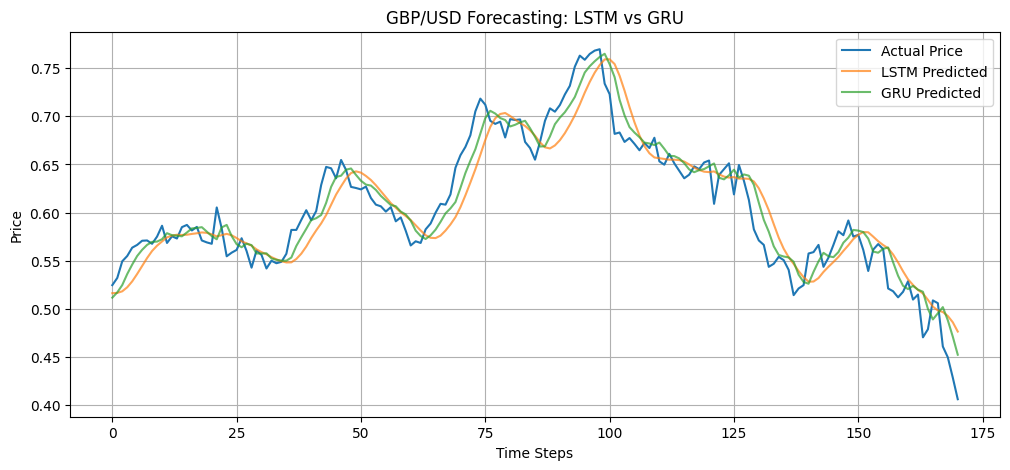

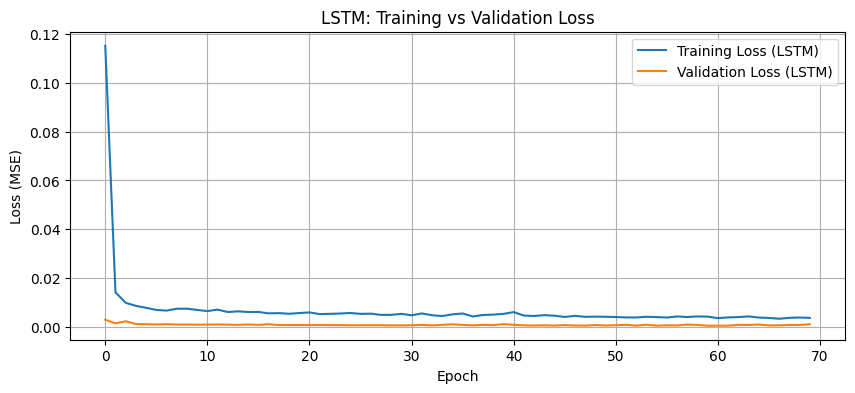

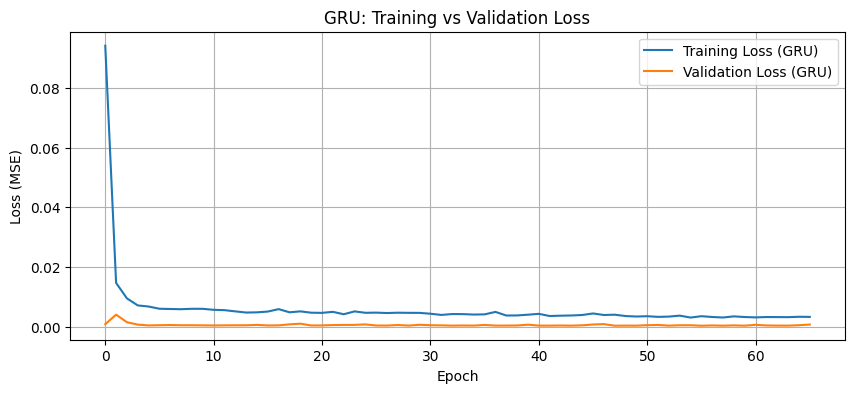


Original rows: 1200
 Rows lost due to sequence windowing: 60
 Final usable sequences: 1140
 Data loss during preprocessing: 5.00%


In [59]:
# Prediction Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(lstm_pred, label='LSTM Predicted', alpha=0.7)
plt.plot(gru_pred, label='GRU Predicted', alpha=0.7)
plt.title('GBP/USD Forecasting: LSTM vs GRU')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves - LSTM
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss (LSTM)')
plt.plot(history.history['val_loss'], label='Validation Loss (LSTM)')
plt.title('LSTM: Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves - GRU
plt.figure(figsize=(10, 4))
plt.plot(gru_history.history['loss'], label='Training Loss (GRU)')
plt.plot(gru_history.history['val_loss'], label='Validation Loss (GRU)')
plt.title('GRU: Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Data Info
original_length = len(df)
final_length = len(df) - seq_length
print(f"\nOriginal rows: {original_length}")
print(f" Rows lost due to sequence windowing: {seq_length}")
print(f" Final usable sequences: {final_length}")
print(f" Data loss during preprocessing: {(seq_length / original_length) * 100:.2f}%")


## **Comparison Table for All the Model**

In [60]:
# Writing all the result for the comparsion table

# Define metrics for each model
comparison_results = {
    '1.FNN': {
        'MAE': 0.022, 'MAPE': 3.626, 'MSE': 0.0001, 'RMSE': 0.027, 'R² Score': 0.845
    },
    '2.CNN + LSTM': {
        'MAE': 0.030, 'MAPE': 5.06, 'MSE': 0.001, 'RMSE': 0.037, 'R² Score': 0.709
    },
    '3.GRU': {
        'MAE': 0.014, 'MAPE': 2.382, 'MSE': 0.000, 'RMSE': 0.018, 'R² Score': 0.932
    },
    '(3.2) Simple RNN': {
        'MAE': 0.013, 'MAPE': 2.130, 'MSE': 0.000, 'RMSE': 0.016, 'R² Score': 0.946
    },
    '4.Regression LSTM ': {
        'MAE': 0.022, 'MAPE': 0.036, 'MSE': 0.001, 'RMSE': 0.027, 'R² Score': 0.845
    },
    '(4.2)  Regression GRU': {
        'MAE': 0.016, 'MAPE': 0.027, 'MSE': 0.000, 'RMSE': 0.020, 'R² Score': 0.917
}}

# Create the DataFrame
comparison_df = pd.DataFrame(comparison_results).T
comparison_df.index.name = 'Model'


# Show comparison for all model in in table
print(tabulate(comparison_df, headers='keys', tablefmt='fancy_grid', floatfmt=".5f"))

╒═══════════════════════╤═════════╤═════════╤═════════╤═════════╤════════════╕
│ Model                 │     MAE │    MAPE │     MSE │    RMSE │   R² Score │
╞═══════════════════════╪═════════╪═════════╪═════════╪═════════╪════════════╡
│ 1.FNN                 │ 0.02200 │ 3.62600 │ 0.00010 │ 0.02700 │    0.84500 │
├───────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────┤
│ 2.CNN + LSTM          │ 0.03000 │ 5.06000 │ 0.00100 │ 0.03700 │    0.70900 │
├───────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────┤
│ 3.GRU                 │ 0.01400 │ 2.38200 │ 0.00000 │ 0.01800 │    0.93200 │
├───────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────┤
│ (3.2) Simple RNN      │ 0.01300 │ 2.13000 │ 0.00000 │ 0.01600 │    0.94600 │
├───────────────────────┼─────────┼─────────┼─────────┼─────────┼────────────┤
│ 4.Regression LSTM     │ 0.02200 │ 0.03600 │ 0.00100 │ 0.02700 │    0.84500 │
├───────────────────────┼─────────┼─────────┼───────